Networks and Word Vectors with MeSH Labels
==========================================

In [1]:
%load_ext line_profiler
%load_ext memory_profiler
%load_ext autoreload
%autoreload 2

In [2]:
import os
import ast
import json
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict, Counter
from datetime import datetime
from itertools import zip_longest
from matplotlib.ticker import NullFormatter

from analysis.src.data.readnwrite import get_data_dir
from analysis.src.data.data_utilities import flatten, eval_column, grouper

pd.options.display.max_columns = 99

In [3]:
from rhodonite.phylomemetic import PhylomemeticGraph
from rhodonite.cooccurrence import CooccurrenceGraph
from rhodonite.spectral import association_strength
from rhodonite.phylomemetic import label_ages

In [4]:
from gensim.corpora import Dictionary

In [5]:
from graph_tool.generation import price_network
from graph_tool.draw import graph_draw
from graph_tool.all import GraphView

In [6]:
%matplotlib inline

# Paths
# Get the top path
data_path = get_data_dir()

# Create the path for external data
ext_data = os.path.join(data_path, 'external')
# Raw data
raw_data = os.path.join(data_path, 'raw')
# And external data
proc_data = os.path.join(data_path, 'processed')
# And interim data
inter_data = os.path.join(data_path, 'interim')
# And figures
fig_path = os.path.join(data_path, 'figures')

# Get date for saving files
today = datetime.utcnow()

today_str = "_".join([str(x) for x in [today.year,today.month,today.day]])

In [7]:
pg = PhylomemeticGraph()
pg.load(os.path.join(proc_data, 'gdb_phylomemetic_10102018/gdb_pg_graph.gt'))

dictionary = Dictionary.load(os.path.join(proc_data, 'gdb_phylomemetic_10102018/dictionary'))

In [13]:
pg.vp['age'] = label_ages(pg)

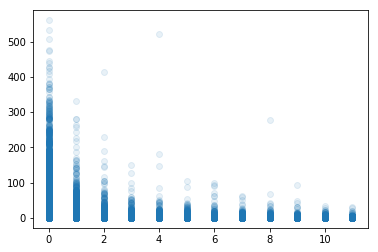

In [27]:
plt.scatter(pg.vp['age'].get_array(), pg.vp['density'].get_array(), alpha=0.1)

In [28]:
from rhodonite.tabular import edges_to_dataframe, vertices_to_dataframe

In [33]:
df_edges = edges_to_dataframe(pg)
df_vertices = vertices_to_dataframe(pg)

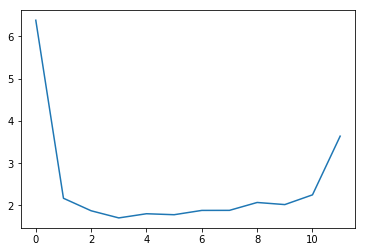

In [40]:
groupby_age = df_vertices.groupby('age').mean()
plt.plot(groupby_age.index, groupby_age['density'])